## Process observations
This notebook loads and processes the CMASS NGC sample, plots them, and saves the n(z).

In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy.io import fits
# mpl.style.use('style.mcstyle')

## NGC

In [2]:
# load survey

def load_galaxies(fname, fields):
    with fits.open(fname) as hdul:
        gals = np.array([hdul[1].data[x] for x in fields]).T
        gals = pd.DataFrame(gals, columns=fields)
    return gals


fname = '../data/obs/galaxy_DR12v5_CMASS_North.fits'
fields = ['RA', 'DEC', 'Z',
          'WEIGHT_SYSTOT', 'WEIGHT_NOZ', 'WEIGHT_CP']
cmass = load_galaxies(fname, fields)

In [3]:
from cmass.survey.selection import apply_mask
from cmass.survey.tools import sky_to_xyz

crdz = cmass[['RA', 'DEC', 'Z']].values

np.random.seed(0)
crdz = apply_mask(crdz, wdir='../data', is_North=True, fibermode=1)

[12:31:41-INFO] Running apply_mask...
[12:31:42-INFO] Applying redshift cut...
[12:31:43-INFO] Removed 39717/618806 galaxies
[12:31:43-INFO] Applying angular mask...
[12:31:50-INFO] Removed 6612/579089 galaxies
[12:31:50-INFO] Applying veto mask...
[12:32:32-INFO] Removed 0/572477 galaxies
[12:32:32-INFO] Applying fiber collisions...
[12:32:35-INFO] Removed 14627/572477 galaxies
[12:32:35-INFO] Finished apply_mask... (0m53s)


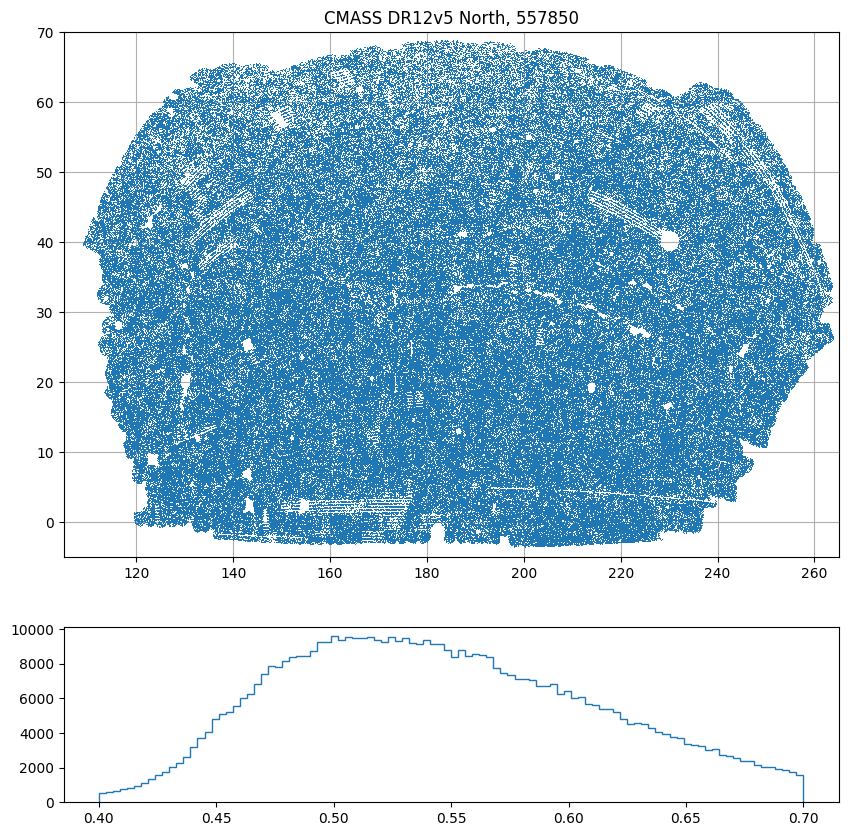

In [4]:
f, axs = plt.subplots(2, 1, figsize=(10, 10),
                      gridspec_kw={'height_ratios': [3, 1]})
axs[0].plot(crdz[:, 0], crdz[:, 1], ',', ms=1, alpha=1)
axs[0].set_title(f'CMASS DR12v5 North, {len(crdz)}')
axs[0].grid()
axs[0].set_xlim(105, 265)
axs[0].set_ylim(-5, 70)
axs[1].hist(crdz[:, 2], bins=100, histtype='step', lw=2)
plt.show()

In [6]:
from cmass.survey.tools import save_lightcone

ra, dec, z = crdz.T

outdir = '/ocean/projects/phy240015p/mho1/cmass-ili/real_data/cmass_ngc/L3000-N384/0/ngc_lightcone'
save_lightcone(
    outdir,
    ra=ra, dec=dec, z=z,
    galsnap=-1,
    galidx=np.arange(len(ra)),
    hod_seed=0,
    aug_seed=0,
    saturated=True,
    config=None
)

[12:32:55-INFO] Saving lightcone to /ocean/projects/phy240015p/mho1/cmass-ili/real_data/cmass_ngc/L3000-N384/0/ngc_lightcone/hod00000_aug00000.h5


In [7]:
# # SAVE THE N(Z)  [DEPRECATED]

# # get optimal binning
# from astropy.stats import scott_bin_width
# bw = scott_bin_width(crdz[:,2])
# bw *= 2  # manual, for smoothness
# be = np.arange(0.4, 0.7+bw, bw)

# # get histogram
# h, be = np.histogram(crdz[:,2], bins=be)

# # plot
# x_ = (be[1:] + be[:-1]) / 2
# f, ax = plt.subplots( figsize=(10, 5))
# ax.plot(x_, h, lw=2)
# ax.set_xlabel('z')
# ax.set_ylabel('N')
# ax.grid()

# # Save into desired location
# outpath = '../cmass/lightcone/nz_DR12v5_CMASS_North_zmin0.4000_zmax0.7000.dat'
# np.savetxt(outpath, h, delimiter='\n', fmt='%d')

## SGC

In [8]:
# load survey

def load_galaxies(fname, fields):
    with fits.open(fname) as hdul:
        gals = np.array([hdul[1].data[x] for x in fields]).T
        gals = pd.DataFrame(gals, columns=fields)
    return gals


fname = '../data/obs/galaxy_DR12v5_CMASS_South.fits'
fields = ['RA', 'DEC', 'Z',
          'WEIGHT_SYSTOT', 'WEIGHT_NOZ', 'WEIGHT_CP']
cmass = load_galaxies(fname, fields)

In [9]:
from cmass.survey.selection import apply_mask
from cmass.survey.tools import sky_to_xyz

crdz = cmass[['RA', 'DEC', 'Z']].values

np.random.seed(0)
crdz = apply_mask(crdz, wdir='../data', is_North=False, fibermode=1)

[12:33:14-INFO] Running apply_mask...
[12:33:14-INFO] Applying redshift cut...
[12:33:14-INFO] Removed 17626/230831 galaxies
[12:33:14-INFO] Applying angular mask...
[12:33:16-INFO] Removed 2712/213205 galaxies
[12:33:16-INFO] Applying veto mask...
[12:33:44-INFO] Removed 0/210493 galaxies
[12:33:44-INFO] Applying fiber collisions...
[12:33:45-INFO] Removed 6145/210493 galaxies
[12:33:45-INFO] Finished apply_mask... (0m30s)


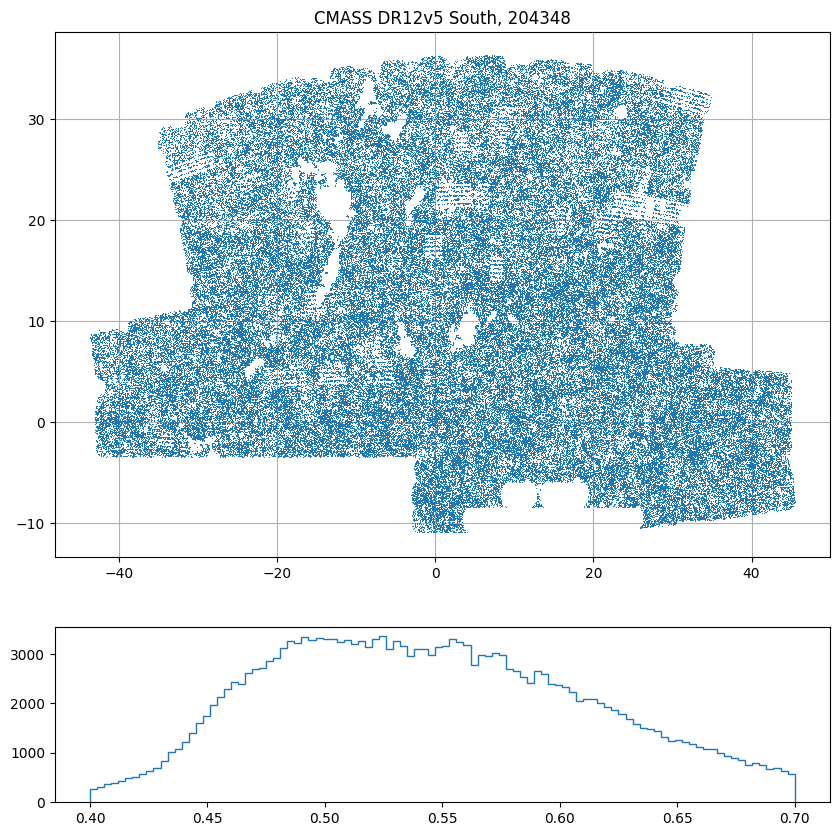

In [ ]:
f, axs = plt.subplots(2, 1, figsize=(10, 10),
                      gridspec_kw={'height_ratios': [3, 1]})
axs[0].plot((crdz[:, 0]+180) % 360-180,
            crdz[:, 1], ',', ms=1, alpha=1)
axs[0].set_title(f'CMASS DR12v5 South, {len(crdz)}')
axs[0].grid()
# axs[0].set_xlim(105, 265)
# axs[0].set_ylim(-5, 70)
axs[1].hist(crdz[:, 2], bins=100, histtype='step', lw=2)
plt.show()

In [11]:
from cmass.survey.tools import save_lightcone

ra, dec, z = crdz.T

outdir = '/ocean/projects/phy240015p/mho1/cmass-ili/real_data/cmass_sgc/L2000-N256/0/sgc_lightcone'
save_lightcone(
    outdir,
    ra=ra, dec=dec, z=z,
    galsnap=-1,
    galidx=np.arange(len(ra)),
    hod_seed=0,
    aug_seed=0,
    saturated=True,
    config=None
)

[12:34:38-INFO] Saving lightcone to /ocean/projects/phy240015p/mho1/cmass-ili/real_data/cmass_sgc/L2000-N256/0/sgc_lightcone/hod00000_aug00000.h5
